In this notebook we will use the `psifr` package to create several visualizations of the AL1/ML1 free recall data, scored on the level of sentences.

In [8]:
# (0) Loading in the data
from psifr import fr
import pandas as pd

df = pd.read_csv("data/psifr_al1_ml1_sl.csv")
df = df.query("modality == 'EEG' or modality == 'MRI'")

# (1) Raster Plots

One of the coolest visualization in this library are the raster plots, which give an easy way to visualize all the free recall data we are working with!

In [5]:
import matplotlib.pyplot as plt

subj_lst = [participant for participant in df["subject_id"].unique().tolist()]

for subject in subj_lst:
    subj = df.query(f"subject_id == '{subject}'")
    if len(subj) > 900:
        g = fr.plot_raster(subj).add_legend()



# (2) SPC

Here we will create 5 serial position curves, one for each passage in `list A`. 

* The x-axis gives the position of the sentence in the passage
* Green lines separate sentences into paragraphs

input,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
recall,0.90625,0.8125,0.71875,0.75,0.0625,0.28125,0.28125,0.09375,0.5625,0.625,0.4375,0.40625,0.625,0.53125,0.59375,0.78125,0.40625,0.46875,0.40625,0.4375


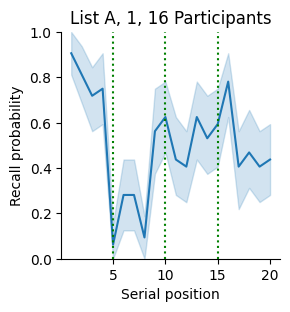

In [10]:
# %%capture
from psifr import fr
import matplotlib.pyplot as plt
story_lists = ["A", "B", "C", "D"]
passages = [1,2,3,4,5]

for story_list in story_lists:
    for passage in passages:
        if story_list == "A" and passage == 1:
            passage_df = df.query(f"story_list == '{story_list}' and passage == {passage}")
            spc = fr.spc(passage_df)
            fr.plot_spc(passage_df)
            plt.vlines(x=[5,10,15], ymin=0, ymax=1,colors="g", linestyles="dotted")
            N = len(passage_df["subject_id"].unique())
            plt.title(f"List {story_list}, {passage}, {N} Participants")
    break

spc.groupby(by=["input"]).mean()[["recall"]].transpose()

*Notes:*

* Woah, there is huge variability in which sentences participants recalled information from, and spc are definitely not U-shaped.

* Probability of recalling a sentence seems to dips at the end of  paragraphs (List 3 and 4 especially)

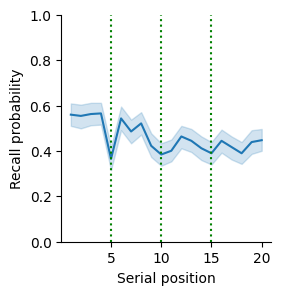

In [9]:
g = fr.plot_spc(df)
plt.vlines(x=[5,10,15], ymin=0, ymax=1,colors="g", linestyles="dotted")

---

What do serial position curves of individual participants look like?

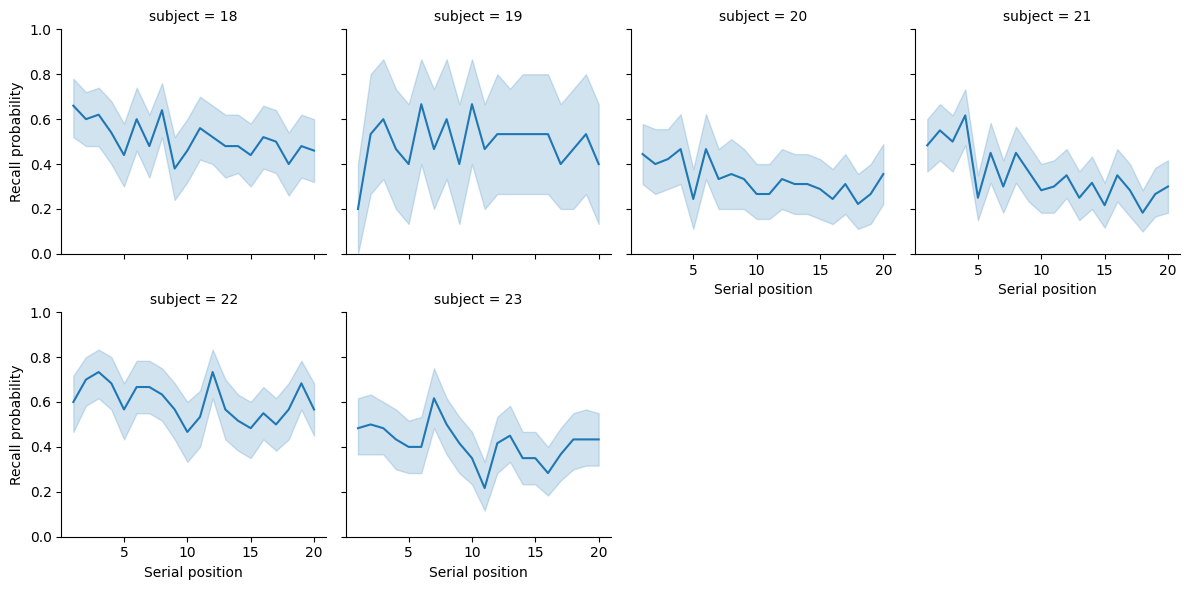

In [10]:
g = fr.plot_spc(df.query("subject_id >= 'HD1001'"), col='subject', col_wrap=4)


* It seems like the farther the participants go through the passage, they recall the same or less information.

# (3) PNR

Probability of `nth` recall shows the probability that a sentece given its position in a passage will be recalled 1st, 2rd, 3rd, or nth.

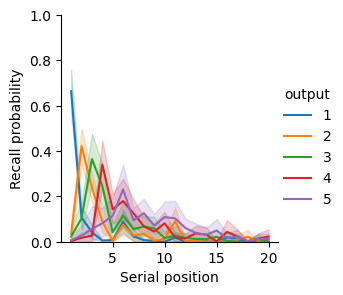

In [11]:
prob = fr.pnr(df)

pfr = prob.query('output <= 5')

g = fr.plot_spc(pfr, hue='output').add_legend()

* Notice how people generally remember the 1st sentence 1st, 2nd sentence second, 3rd sentence 3rd, and so on.

# (4) Lag CRP

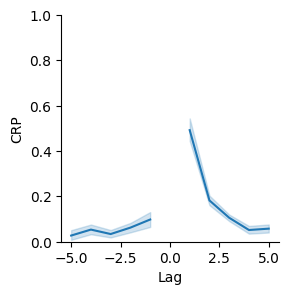

In [8]:
from psifr import fr 
crp = fr.lag_crp(df)
fr.plot_lag_crp(crp)

In [9]:
crp = crp.groupby("lag").sum()
prob = [actual / (possible+.00000001) for (actual, possible ) in zip(crp["actual"], crp["possible"])]
crp["prob"] = prob
crp[['prob']].query("lag < 5 and lag > -5 and lag !=0" ).transpose()

lag,-4,-3,-2,-1,1,2,3,4
prob,0.050633,0.039604,0.061914,0.106691,0.531832,0.184566,0.09942,0.047785
